In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


from sklearn.metrics import accuracy_score, \
    precision_score, recall_score, classification_report,\
    roc_auc_score, roc_curve, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

import cv2

In [6]:
cancer_path = "./Dataset/CANCER"
healthy_path = "./Dataset/HEALTHY"


In [7]:
def load_and_preprocess_images(img_path):
    images = []
    labels = []
    for filename in os.listdir(img_path):
        img = cv2.imread(os.path.join(img_path, filename), cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:  
            img = cv2.resize(img, (128, 128)) 
            images.append(img.flatten())
            labels.append(1 if "CANCER" in img_path else 0) 
    return np.array(images), np.array(labels)

In [8]:
cancer_images, cancer_labels = load_and_preprocess_images(cancer_path)
healthy_images, healthy_labels = load_and_preprocess_images(healthy_path)


In [9]:
images = np.concatenate((cancer_images, healthy_images))
labels = np.concatenate((cancer_labels, healthy_labels))


In [10]:
images , labels

(array([[234, 244, 241, ..., 239, 238, 239],
        [234, 232, 231, ..., 238, 238, 237],
        [225, 227, 226, ..., 240, 241, 240],
        ...,
        [244, 241, 242, ..., 242, 240, 240],
        [223, 208, 214, ..., 206, 202, 238],
        [228, 227, 226, ..., 220, 233, 225]], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0

In [11]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [12]:
len(X_train), len(y_train)

(268, 268)

In [13]:
len(X_test),len(y_test)

(68, 68)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[-1.46143448e-01, -1.68606403e-01,  1.11131268e-01, ...,
        -1.23629183e+00, -9.26885557e-01, -2.43699437e-01],
       [-1.55754684e+00, -1.26036115e+00, -1.70570759e+00, ...,
         2.63807154e-01,  8.56098431e-01,  7.52836759e-01],
       [ 4.18417908e-01,  3.77270972e-01,  3.05792574e-01, ...,
         5.24693934e-01,  7.13459712e-01,  7.52836759e-01],
       ...,
       [ 6.55670604e-02,  1.34658805e-01,  1.11131268e-01, ...,
         2.92037440e-03,  2.66117013e-04, -7.03639220e-01],
       [ 4.88988077e-01,  5.59230098e-01,  5.65340983e-01, ...,
         7.85580714e-01,  9.27417791e-01,  6.76180129e-01],
       [ 1.36137230e-01,  6.80536181e-01,  1.11131268e-01, ...,
        -6.23013205e-02,  1.28401459e+00,  8.29493390e-01]])

In [16]:

models = {}

models['Logistic Regression'] = LogisticRegression()
models['Support Vector Machines'] =  LinearSVC()
models['Decision Trees'] =  DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()
models['XGBoost'] = XGBClassifier()


accuracy, precision, recall = {}, {}, {}

for key in models.keys():


    models[key].fit(X_train, y_train)


    predictions = models[key].predict(X_test)

  
    accuracy[key] = accuracy_score(predictions, y_test)
    precision = precision_score(Y_val_encoded, predictions, average='weighted')  # Use average='weighted' for multiclass
    recall = recall_score(Y_val_encoded, predictions, average='weighted')  # Use average='weighted' for multiclass
    
    Y_predict = models[key].predict(X_test)
    auc = roc_auc_score(y_test, Y_predict)

    print('Classification Report:',key)
    print(classification_report(y_test,predictions))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, predictions))

#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    sns.heatmap(confusion_matrix(y_test,predictions),fmt='',annot=True)

NameError: name 'Y_val_encoded' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, Y_train, X_val, Y_val):
    # Fit the classifier model
    model.fit(X_train, Y_train)

    # Prediction
    predictions = model.predict(X_val)

    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_val, predictions)
    precision = precision_score(Y_val, predictions, average='weighted')  # Use average='weighted' for multiclass
    recall = recall_score(Y_val, predictions, average='weighted')  # Use average='weighted' for multiclass

    # Calculate ROC AUC score
    if hasattr(model, "predict_proba"):
        probability_scores = model.predict_proba(X_val)
        auc = roc_auc_score(Y_val, probability_scores, multi_class='ovr', average='weighted')
    else:
        auc = None

    classification_rep = classification_report(Y_val, predictions)

    # Store evaluation metrics
    evaluation_metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC_AUC_SCORE': auc,
        'Classification Report': classification_rep,
        'Confusion Matrix': confusion_matrix(Y_val, predictions)
    }

    # Print evaluation metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC Score: {auc}")
    print(f"Classification Report:\n{classification_rep}")
    print(f"Confusion Matrix:\n{confusion_matrix(Y_val, predictions)}")

    if auc is not None:
        # Plot ROC curve
        for i in range(probability_scores.shape[1]):
            false_positive_rate, true_positive_rate, _ = roc_curve(Y_val, probability_scores[:, i], pos_label=i)
            plt.plot(false_positive_rate, true_positive_rate, label=f'Class {i} ROC curve')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC curve')
        plt.legend()
        plt.show()

    # Plot Confusion Matrix
    plt.imshow(confusion_matrix(Y_val, predictions), interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = list(range(len(set(Y_val))))  # Assuming number of classes equal to unique labels in Y_val
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
    return evaluation_metrics


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Create and evaluate AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100)
print("AdaBoost")
evaluate_model(ada_model, X_train, y_train, X_test, y_test)

# Create and evaluate Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100)
print("Gradient Boosting")
evaluate_model(gb_model, X_train, y_train, X_test, y_test)

# Create and evaluate XGBoost model
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
print("XGBoost")
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Create and evaluate LightGBM model
lgb_model = LGBMClassifier(n_estimators=100)
print("LightGBM")
evaluate_model(lgb_model, X_train, y_train, X_test, y_test)

# Create and evaluate CatBoost model
catboost_model = CatBoostClassifier(iterations=100, verbose=0)
print("CatBoost")
evaluate_model(catboost_model, X_train, y_train, X_test, y_test)


In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

AdaBoost


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.96      0.96      0.96        45

    accuracy                           0.94        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.94      0.94      0.94        68



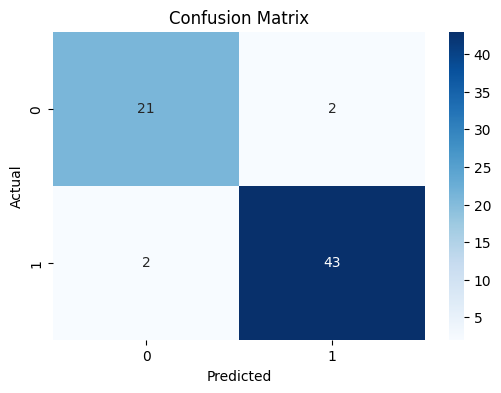

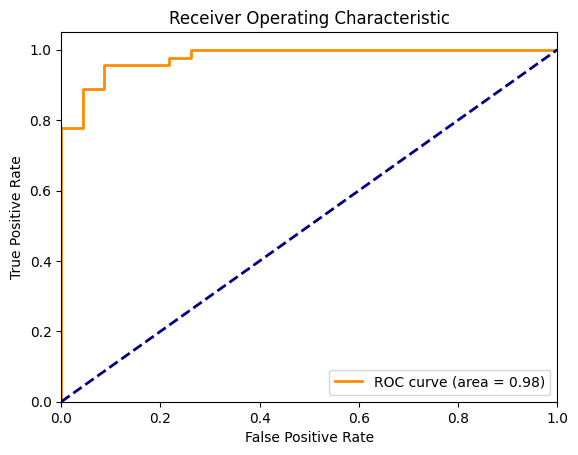

Gradient Boosting
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.96      0.98      0.97        45

    accuracy                           0.96        68
   macro avg       0.96      0.95      0.95        68
weighted avg       0.96      0.96      0.96        68



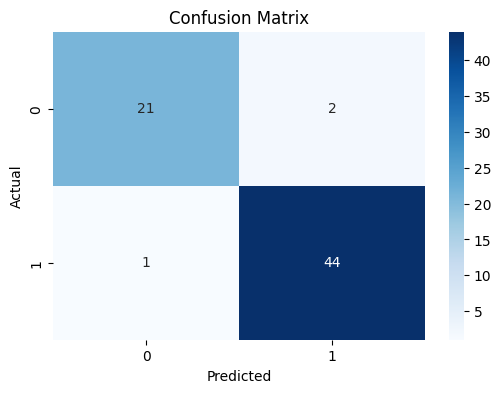

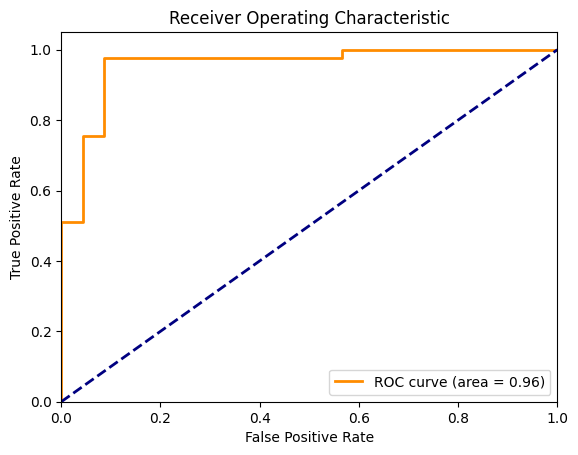

XGBoost
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.95      0.93      0.94        45

    accuracy                           0.93        68
   macro avg       0.91      0.92      0.92        68
weighted avg       0.93      0.93      0.93        68



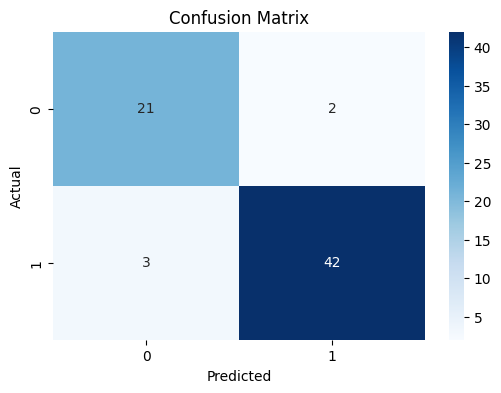

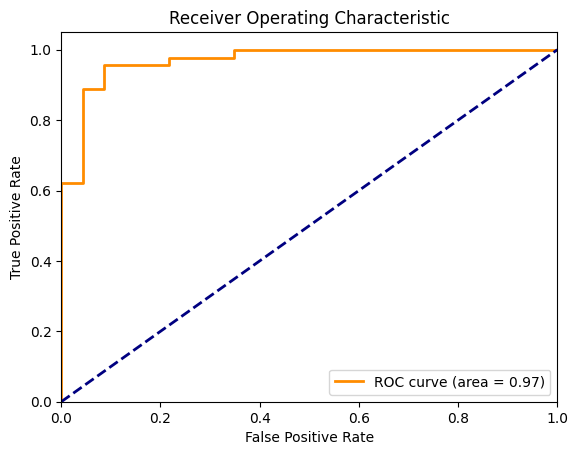

LightGBM
[LightGBM] [Info] Number of positive: 158, number of negative: 110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.132157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 666458
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 16384
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.589552 -> initscore=0.362115
[LightGBM] [Info] Start training from score 0.362115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

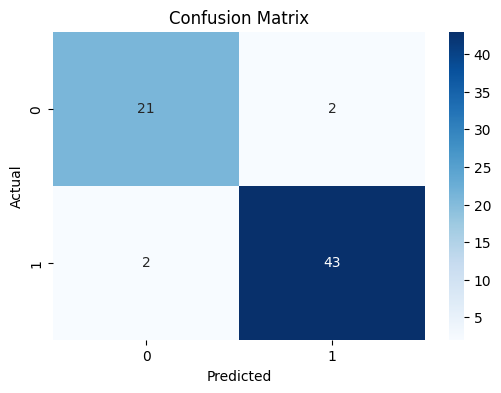

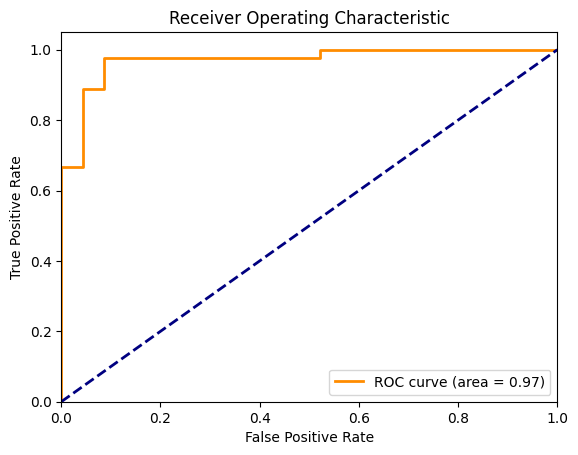

CatBoost
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.96      0.96      0.96        45

    accuracy                           0.94        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.94      0.94      0.94        68



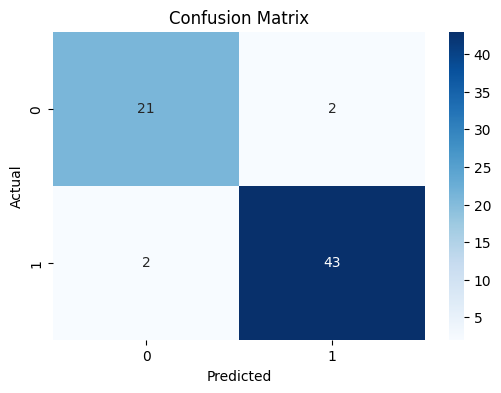

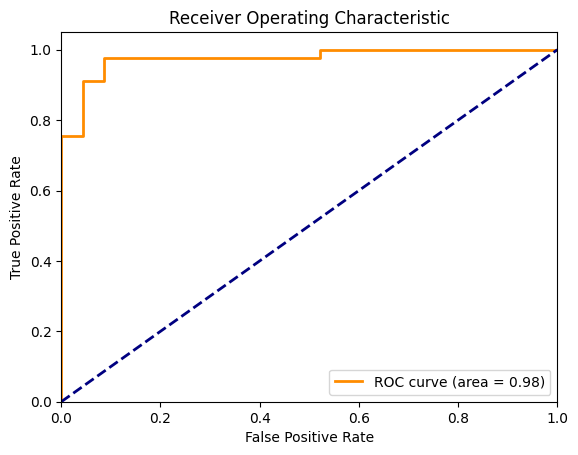

In [ ]:
# Create and evaluate AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100)
print("AdaBoost")
evaluate_model(ada_model, X_train, y_train, X_test, y_test)

# Create and evaluate Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100)
print("Gradient Boosting")
evaluate_model(gb_model, X_train, y_train, X_test, y_test)

# Create and evaluate XGBoost model
xgb_model = XGBClassifier(n_estimators=100)
print("XGBoost")
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Create and evaluate LightGBM model
lgb_model = LGBMClassifier(n_estimators=100)
print("LightGBM")
evaluate_model(lgb_model, X_train, y_train, X_test, y_test)

# Create and evaluate CatBoost model
catboost_model = CatBoostClassifier(iterations=100, verbose=0)
print("CatBoost")
evaluate_model(catboost_model, X_train, y_train, X_test, y_test)

In [ ]:
accuracy_ensemble, precision_ensemble, recall_ensemble = {}, {}, {}
models_ensemble = {}

def evaluate(model, X_train, X_val, Y_train,y_val,key):

    model.fit(X_train, Y_train)

    # Prediction
    predictions = model.predict(X_val)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy_ensemble[key]= accuracy_score(predictions, y_val)
    precision_ensemble[key] = precision_score(predictions, y_val)
    recall_ensemble[key] = recall_score(predictions, y_val)

    auc = roc_auc_score(y_val, predictions)
    print('Classification Report:')
    print(classification_report(y_val,predictions,digits=4))

    sns.heatmap(confusion_matrix(y_val,predictions),fmt='',annot=True)

    plt.title('Confusion Matrix')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

In [ ]:
models_ensemble = {}

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate set to 0.005871
0:	learn: 0.6878104	total: 566ms	remaining: 9m 25s
1:	learn: 0.6827004	total: 1.15s	remaining: 9m 36s
2:	learn: 0.6770270	total: 1.63s	remaining: 9m
3:	learn: 0.6716865	total: 2.08s	remaining: 8m 39s
4:	learn: 0.6666302	total: 2.57s	remaining: 8m 32s
5:	learn: 0.6615743	total: 3.06s	remaining: 8m 26s
6:	learn: 0.6566933	total: 3.54s	remaining: 8m 22s
7:	learn: 0.6529621	total: 4.02s	remaining: 8m 18s
8:	learn: 0.6479199	total: 4.48s	remaining: 8m 13s
9:	learn: 0.6429051	total: 4.96s	remaining: 8m 10s
10:	learn: 0.6382195	total: 5.44s	remaining: 8m 9s
11:	learn: 0.6341560	total: 5.93s	remaining: 8m 8s
12:	learn: 0.6287300	total: 6.44s	remaining: 8m 9s
13:	learn: 0.6238240	total: 6.94s	remaining: 8m 9s
14:	learn: 0.6193159	total: 7.57s	remaining: 8m 17s
15:	learn: 0.6162265	total: 8.13s	remaining: 8m 19s
16:	learn: 0.6117725	total: 8.62s	remaining: 8m 18s
17:	learn: 0.6077278	total: 9.17s	remaining: 8m 20s
18:	learn: 0.6032067	total: 9.71s	remaining: 8m 21s


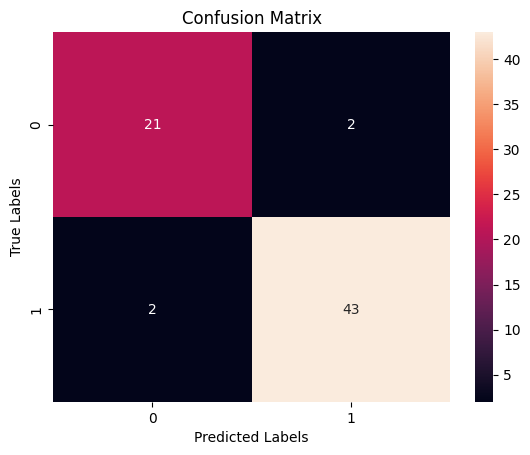

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = XGBClassifier()
clf4 = CatBoostClassifier()
models_ensemble['Soft Voting'] = VotingClassifier(estimators=[('AdaBoost', clf1), ('Random Forest', clf2), ('XGB', clf3),('Cat Boost',clf4)], voting='soft')
evaluate(models_ensemble['Soft Voting'],X_train, X_test, y_train, y_test,'Soft Voting')

Classification Report:
              precision    recall  f1-score   support

           0     0.8400    0.9130    0.8750        23
           1     0.9535    0.9111    0.9318        45

    accuracy                         0.9118        68
   macro avg     0.8967    0.9121    0.9034        68
weighted avg     0.9151    0.9118    0.9126        68



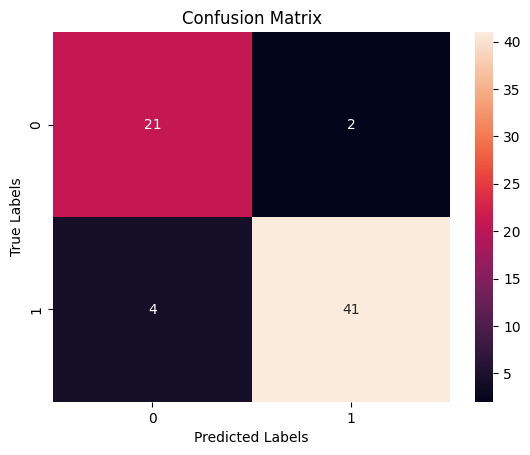

In [ ]:
from sklearn.ensemble import BaggingClassifier
tree = XGBClassifier()
models_ensemble['Bagging'] = BaggingClassifier(estimator=tree, n_estimators=10, random_state=0)
evaluate(models_ensemble['Bagging'],X_train,X_test,y_train,y_test,'Bagging')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier()


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


grid_search_rf.fit(X_train, y_train)


print(grid_search_rf.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
rf_best_est = RandomForestClassifier(max_depth= 30, min_samples_leaf= 4, min_samples_split= 2, n_estimators=200)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.93      0.96      0.95        45

    accuracy                           0.93        68
   macro avg       0.92      0.91      0.92        68
weighted avg       0.93      0.93      0.93        68



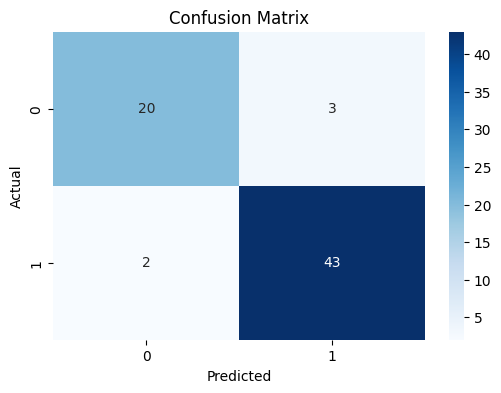

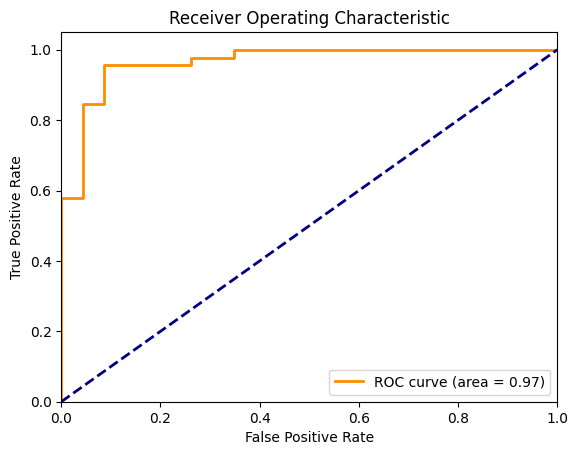

In [ ]:
evaluate_model(rf_best_est, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV


Xgb = RandomForestClassifier()


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(estimator=Xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


grid_search_rf.fit(X_train, y_train)


print(grid_search_rf.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:

Xgb_best_est = RandomForestClassifier(max_depth= 30, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 300)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.93      0.96      0.95        45

    accuracy                           0.93        68
   macro avg       0.92      0.91      0.92        68
weighted avg       0.93      0.93      0.93        68



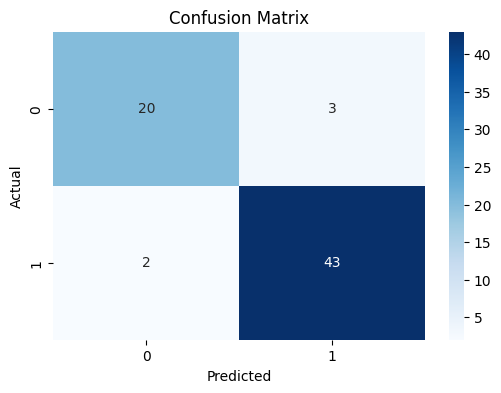

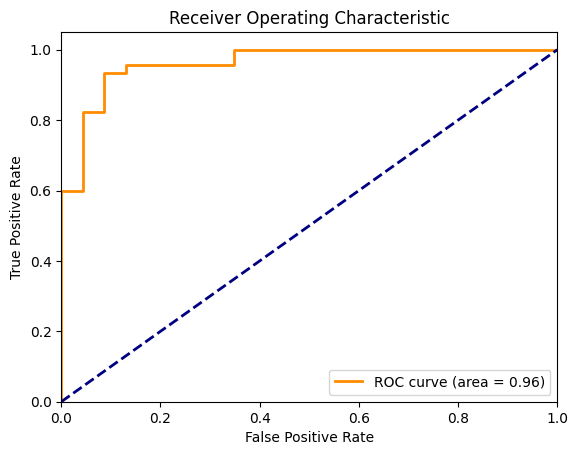

In [ ]:
evaluate_model(Xgb_best_est, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV


gb = GradientBoostingClassifier()


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


grid_search_rf.fit(X_train, y_train)


print(grid_search_rf.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
gb_best_est = GradientBoostingClassifier(max_depth= 30, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 300)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.93      0.96      0.95        45

    accuracy                           0.93        68
   macro avg       0.92      0.91      0.92        68
weighted avg       0.93      0.93      0.93        68



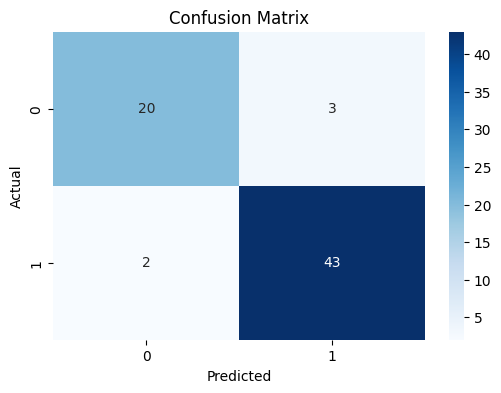

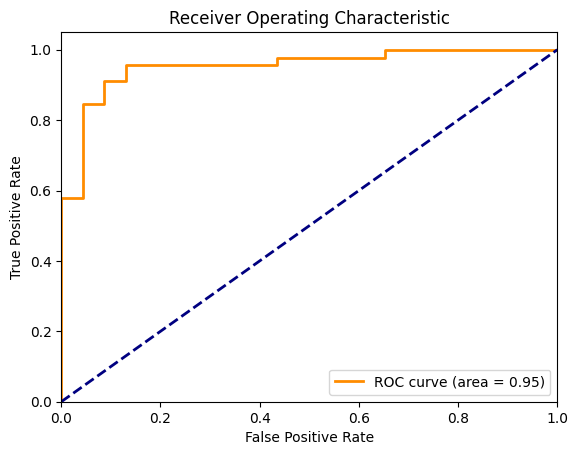

In [ ]:
evaluate_model(gb_best_est, X_train, y_train, X_test, y_test)

In [ ]:
sgbt = GradientBoostingClassifier(max_depth= 50, min_samples_leaf= 4, min_samples_split= 10,subsample=0.8,max_features=0.2,n_estimators=300,random_state=400)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.96      0.96      0.96        45

    accuracy                           0.94        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.94      0.94      0.94        68



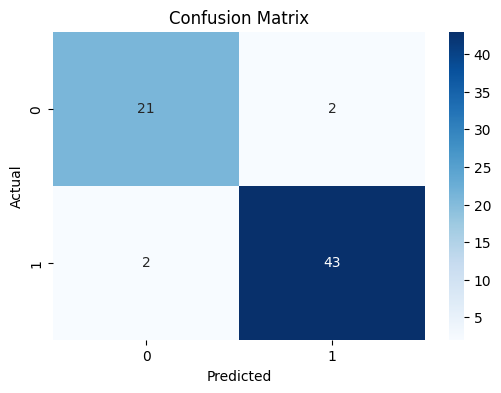

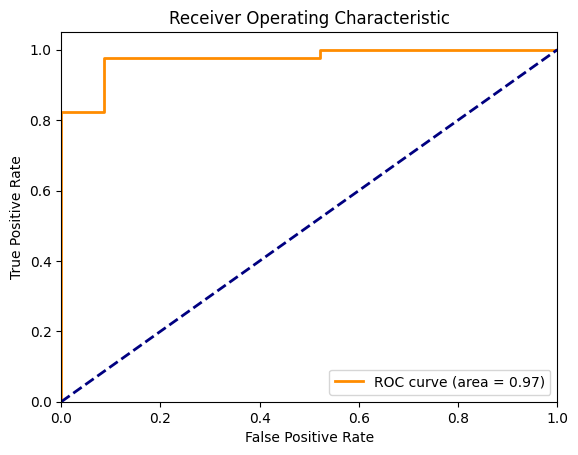

In [ ]:
evaluate_model(sgbt, X_train, y_train, X_test, y_test)